# OCR Evaluation Notebook

This notebook demonstrates how to perform OCR on PDF documents and evaluate the quality of the OCR results.

In [2]:
# Import required libraries
import os
import pytesseract
from PIL import Image
import numpy as np
from fuzzywuzzy import fuzz
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\wilan\.conda\envs\advancerag\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
# Set up Tesseract path (adjust this path to your Tesseract installation)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
class OCREvaluator:
    def __init__(self, confidence_threshold=70, similarity_threshold=80):
        self.confidence_threshold = confidence_threshold
        self.similarity_threshold = similarity_threshold

    def evaluate_ocr(self, image, ocr_text):
        # Get detailed OCR data
        ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
        
        # Calculate average confidence
        confidences = [int(conf) for conf in ocr_data['conf'] if conf != '-1']
        avg_confidence = np.mean(confidences) if confidences else 0

        # Perform a second OCR pass with different settings
        second_pass_text = pytesseract.image_to_string(image, config='--psm 6')
        
        # Calculate text similarity
        similarity = fuzz.ratio(ocr_text, second_pass_text)

        # Determine if the OCR result is acceptable
        is_acceptable = (avg_confidence >= self.confidence_threshold and 
                         similarity >= self.similarity_threshold)

        return {
            'is_acceptable': is_acceptable,
            'average_confidence': avg_confidence,
            'text_similarity': similarity
        }

In [5]:
def process_pdf(pdf_path, dpi=300):
    evaluator = OCREvaluator()
    results = []

    # Convert PDF to images
    images = convert_from_path(pdf_path, dpi=dpi)

    for i, image in enumerate(images):
        # Perform OCR
        text = pytesseract.image_to_string(image)
        
        # Evaluate OCR result
        evaluation = evaluator.evaluate_ocr(image, text)
        
        results.append({
            'page': i + 1,
            'text': text,
            'evaluation': evaluation
        })
        
        # Display results
        print(f"Page {i + 1}:")
        print(f"OCR Acceptable: {evaluation['is_acceptable']}")
        print(f"Average Confidence: {evaluation['average_confidence']:.2f}")
        print(f"Text Similarity: {evaluation['text_similarity']:.2f}")
        print("\n")
    
    return results, images

Page 1:
OCR Acceptable: False
Average Confidence: 42.10
Text Similarity: 73.00


Page 2:
OCR Acceptable: False
Average Confidence: 55.25
Text Similarity: 99.00


Page 3:
OCR Acceptable: False
Average Confidence: 48.05
Text Similarity: 90.00


Page 4:
OCR Acceptable: False
Average Confidence: 60.35
Text Similarity: 95.00


Page 5:
OCR Acceptable: True
Average Confidence: 70.21
Text Similarity: 98.00


Page 6:
OCR Acceptable: True
Average Confidence: 79.68
Text Similarity: 100.00


Page 7:
OCR Acceptable: False
Average Confidence: 68.28
Text Similarity: 100.00


Page 8:
OCR Acceptable: False
Average Confidence: 40.37
Text Similarity: 22.00


Page 9:
OCR Acceptable: False
Average Confidence: 45.08
Text Similarity: 26.00


Page 10:
OCR Acceptable: False
Average Confidence: 50.53
Text Similarity: 45.00


Page 11:
OCR Acceptable: False
Average Confidence: 69.71
Text Similarity: 99.00


Page 12:
OCR Acceptable: True
Average Confidence: 76.18
Text Similarity: 100.00


Page 13:
OCR Acceptable: 

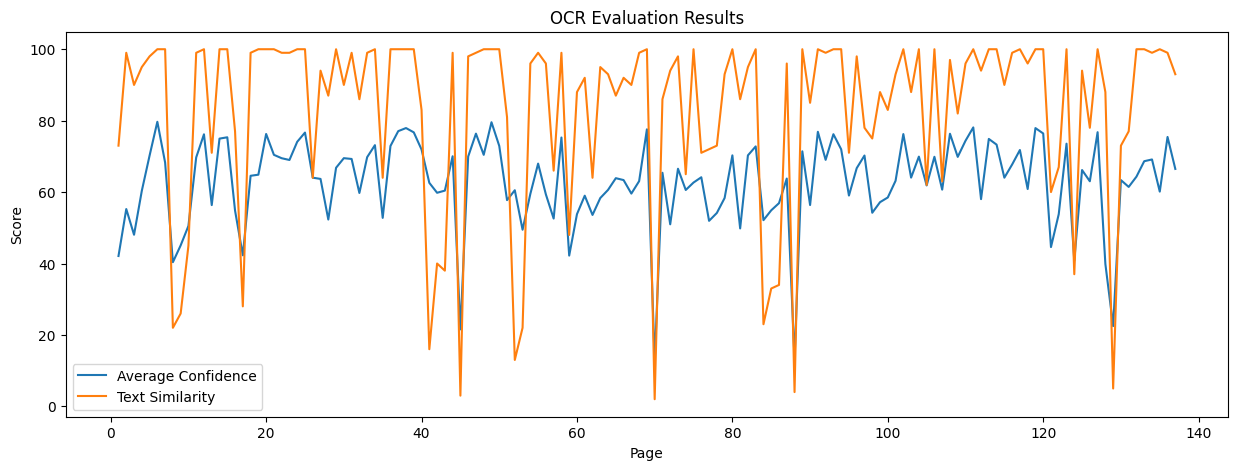

In [6]:
# Process a PDF file
pdf_path = 'D:/Nazirman/VectorDb/Milvus/Data/Hulu Migas,Pertamina, dan Kesinambuangan Fiskal_BUKU.pdf'  # Replace with your PDF file path
results, images = process_pdf(pdf_path)

# Visualize results
plt.figure(figsize=(15, 5))
pages = [r['page'] for r in results]
confidences = [r['evaluation']['average_confidence'] for r in results]
similarities = [r['evaluation']['text_similarity'] for r in results]

plt.plot(pages, confidences, label='Average Confidence')
plt.plot(pages, similarities, label='Text Similarity')
plt.xlabel('Page')
plt.ylabel('Score')
plt.title('OCR Evaluation Results')
plt.legend()
plt.show()

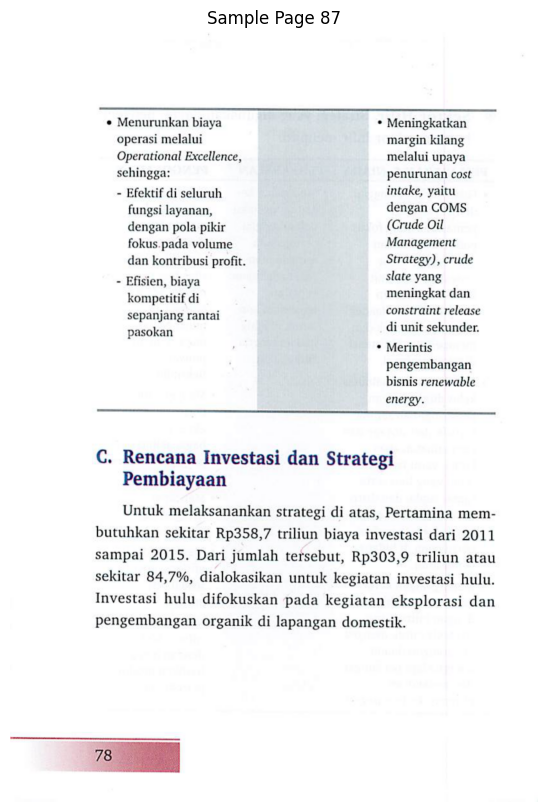

OCR Text:
¢ Menurunkan biaya * Meningkatkan

operasi melalui margin kilang
Operational Excellence, melalui upaya
sehingga: penurunan cost
- Efektif di seluruh intake, yaitu
fungsi layanan, dengan COMS
dengan pola pikir (Crude Oil
fokus.pada volume Management
dan kontribusi profit. Strategy), crude
- Efisien, biaya slate yang
kompetitif di meningkat dan
: F constraint release
sepanjang rantai ame
di unit sekunder.
pasokan
* Merintis
pengembangan
bisnis renewable
energy.

C. Rencana Investasi dan Strategi
Pembiayaan

Untuk melaksanankan strategi di atas, Pertamina mem-
butuhkan sekitar Rp358,7 triliun biaya investasi dari 2011
sampai 2015. Dari jumlah tersebut, Rp303,9 triliun atau
sekitar 84,7%, dialokasikan untuk kegiatan investasi hulu.
Investasi hulu difokuskan pada kegiatan eksplorasi dan
pengembangan organik di lapangan domestik.

=



In [9]:
# Display a sample page with its OCR text
sample_page = 86  # Change this to view different pages

plt.figure(figsize=(15, 10))
plt.imshow(images[sample_page])
plt.axis('off')
plt.title(f'Sample Page {sample_page + 1}')
plt.show()

print("OCR Text:")
print(results[sample_page]['text'])

## Conclusion

This notebook demonstrates how to perform OCR on PDF documents and evaluate the quality of the results. You can use this as a starting point to analyze and improve OCR performance for your specific use case.